In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [44]:
df=pd.read_csv('churn_prediction_datsset\Customer-Churn-Records.csv')

In [45]:
df.head()
#print(df.shape)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [47]:
df.duplicated().sum()

0

In [48]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64

In [49]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [50]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [51]:
 #since some coloumns doesn't intrest us,we will remove it
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [52]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [53]:
df = pd.get_dummies(df,columns=['Geography','Gender','Card Type'],drop_first=True)

In [54]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,300,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,5,771,False,False,True,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,1,1,3,564,False,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,2,339,True,False,True,True,False,False


In [55]:
X=df.drop(columns=['Exited'])
Y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=1)

In [56]:
X


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,1,3,456,False,True,False,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,False,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,300,False,False,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,5,771,False,False,True,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,1,3,564,False,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,2,339,True,False,True,True,False,False


In [57]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [58]:
X.shape

(10000, 17)

In [59]:
Y.shape

(10000,)

In [60]:
X_train.shape


(9000, 17)

In [61]:
Y_train.shape

(9000,)

In [62]:
X_test.shape

(1000, 17)

In [63]:
Y_test.shape

(1000,)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [65]:
X_test_scaled

array([[-1.03388793,  0.7686157 , -1.05273865, ...,  1.73719807,
        -0.58128485, -0.5761528 ],
       [ 0.31124697, -0.46854586, -0.70653162, ..., -0.5756396 ,
        -0.58128485,  1.73565068],
       [-1.23048457,  0.29278433, -1.05273865, ...,  1.73719807,
        -0.58128485, -0.5761528 ],
       ...,
       [ 1.02520319, -0.37337959, -0.70653162, ..., -0.5756396 ,
        -0.58128485,  1.73565068],
       [ 1.54256276, -0.65887841, -0.70653162, ..., -0.5756396 ,
        -0.58128485,  1.73565068],
       [ 0.17673348,  0.86378197, -1.39894569, ...,  1.73719807,
        -0.58128485, -0.5761528 ]])

In [66]:
X_train_scaled

array([[-0.06125192,  0.10245178, -0.36032459, ..., -0.5756396 ,
        -0.58128485, -0.5761528 ],
       [-0.43375082,  2.19610981,  1.02450355, ...,  1.73719807,
        -0.58128485, -0.5761528 ],
       [ 1.32527174, -0.08788077, -0.70653162, ..., -0.5756396 ,
        -0.58128485,  1.73565068],
       ...,
       [ 0.22846944,  0.57828315,  1.37071058, ..., -0.5756396 ,
         1.72032696, -0.5761528 ],
       [ 0.13534471,  0.00728551,  1.02450355, ..., -0.5756396 ,
        -0.58128485,  1.73565068],
       [ 1.17006387,  0.29278433,  0.33208948, ...,  1.73719807,
        -0.58128485, -0.5761528 ]])

In [67]:
%pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [89]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [239]:
model=Sequential()
model.add(InputLayer(shape=(17,)))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [240]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 3)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58 (232.00 B)

 Trainable params: 58 (232.00 B)

 Non-trainable params: 0 (0.00 B)

In [241]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [242]:
history=model.fit(X_train_scaled,Y_train,epochs=20,validation_split=0.2)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2477 - loss: 0.8478 - val_accuracy: 0.6428 - val_loss: 0.6591
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7598 - loss: 0.6107 - val_accuracy: 0.8978 - val_loss: 0.5078
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8987 - loss: 0.4797 - val_accuracy: 0.8500 - val_loss: 0.4168
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8566 - loss: 0.3966 - val_accuracy: 0.8394 - val_loss: 0.3571
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8528 - loss: 0.3451 - val_accuracy: 0.8783 - val_loss: 0.3097
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9035 - loss: 0.2992 - val_accuracy: 0.9617 - val_loss: 0.2665
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.2555 - val_accuracy: 0.9922 - val_loss: 0.2256
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9948 - loss: 0.2156 - val_accuracy: 0.

In [243]:
model.layers[0].get_weights()

[array([[-3.07167713e-02,  2.80999895e-02, -2.91555505e-02],
        [ 2.72904366e-01, -2.48157188e-01,  2.81022906e-01],
        [-2.48263981e-02,  2.43312642e-02, -3.14333476e-02],
        [ 6.45422637e-02, -4.74617407e-02,  5.09288386e-02],
        [-2.92154253e-02,  3.08089834e-02, -3.36264521e-02],
        [-3.92837171e-03,  5.96513040e-03, -7.71152927e-03],
        [-1.94746941e-01,  1.81208134e-01, -2.05003843e-01],
        [ 9.00504552e-03, -5.53987874e-03,  2.85003614e-03],
        [ 2.35399652e+00, -2.74373698e+00,  2.38695717e+00],
        [-1.46474754e-02,  1.27388109e-02, -1.34478044e-02],
        [-1.43546043e-02,  1.29174795e-02, -1.94370765e-02],
        [ 8.74926075e-02, -9.60560590e-02,  1.04859434e-01],
        [ 7.60433776e-03, -9.97762848e-03,  1.46616111e-02],
        [-7.04049841e-02,  6.43935949e-02, -7.58444369e-02],
        [-2.07884945e-02,  1.03718527e-02, -2.27061752e-02],
        [-2.64691487e-02,  1.41829019e-02, -2.91672535e-02],
        [-3.49033391e-03

In [244]:
#above array is weights of 1st layer
#below array is bias of 1st layer

In [245]:
Y_log=model.predict(X_test_scaled)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [246]:
#setting a threshold=.6

In [247]:
Y_predict=np.where(Y_log>0.6,1,0)

In [248]:
 from sklearn.metrics import accuracy_score

In [249]:
accuracy_score(Y_test,Y_predict)

0.997

In [250]:
history.history

{'accuracy': [0.3529166579246521,
  0.8287500143051147,
  0.8809722065925598,
  0.8497222065925598,
  0.8681944608688354,
  0.9226388931274414,
  0.9758333563804626,
  0.9962499737739563,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705],
 'loss': [0.7770786285400391,
  0.5737482309341431,
  0.4565310478210449,
  0.38365915417671204,
  0.3315906822681427,
  0.28707605600357056,
  0.24523001909255981,
  0.20613688230514526,
  0.17130056023597717,
  0.14179450273513794,
  0.11769890040159225,
  0.09839461743831635,
  0.08300136774778366,
  0.0706855058670044,
  0.06076857075095177,
  0.05270484462380409,
  0.04609416797757149,
  0.04062126204371452,
  0.03605884686112404,
  0.03222787007689476],
 'val_accuracy': [0.6427778005599976,
  0.897777795791626,
  0.8500000238418579,
  

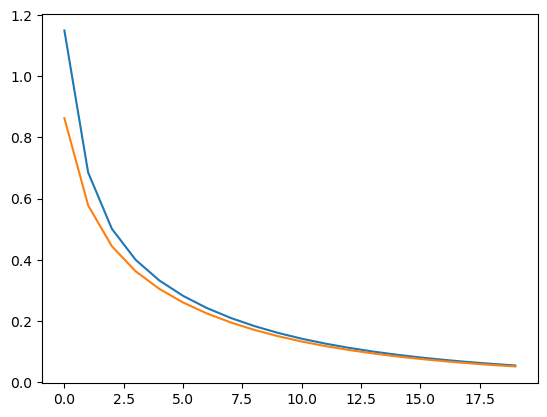

In [237]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

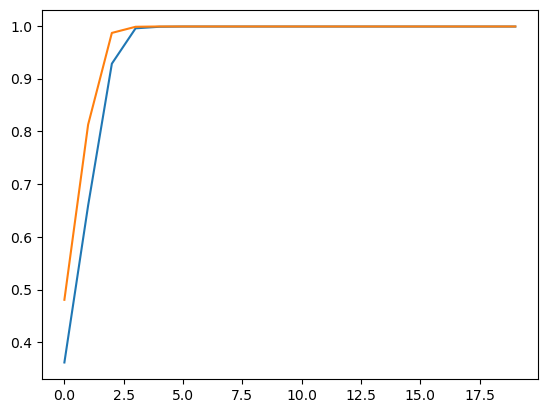

In [238]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])